# Бета-распределение

Text(0.5,0,'$x$')

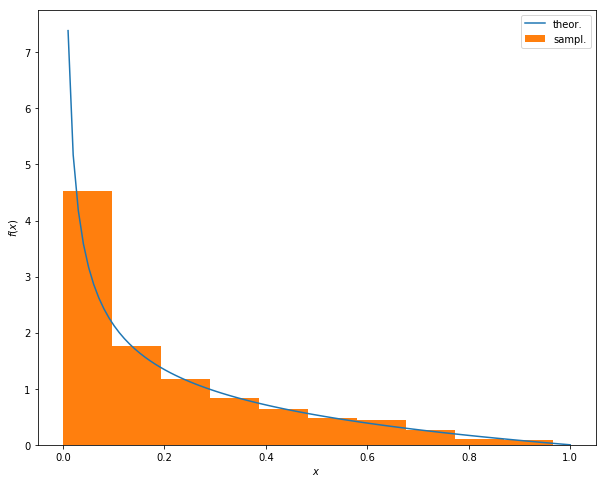

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import math
import random
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,8)

#для выполнения задания было выбранно бета распределение с параметрами a = 0.5 и b = 2

#создадим бета распределение с параметрами a = 0.5 и b = 2 и выборку из него с n = 1000
a = 0.5
b = 2.0
beta_rv = stats.beta(a,b)
pr_beta = beta_rv.rvs(1000)

x = np.linspace(0,1,100)
#строим гистограмму выборки и рисуем поверх неё теоретическую плотность распределения
plt.plot(x, beta_rv.pdf(x), label='theor.',alpha=1)
plt.hist(pr_beta,normed=True,label='sampl.')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

In [3]:
#считаем среднее и дисперсию нашего распределения
mu_tr = a/(a+b)
sigma_tr = math.sqrt((a*b)/(((a+b)**2)*(a+b+1)))

print ('mu {:.2f}' .format(mu_tr))
print ('sigma {:.2f}' .format(sigma_tr))

mu 0.20
sigma 0.21


In [10]:
#Функция генерирования 1000 выборок по n элементов
def fnc_gen(fnc,size):
    zn = []
    for i in range(1000):
        sub_fnc = fnc[np.random.randint(0,len(fnc),size)]
        zn.append(np.mean(sub_fnc))

#Подсчет среднего
    mu_1 = np.mean(zn)
    sigma_1 = np.std(zn,ddof=1)
    s_e = s_tr/math.sqrt(size)
    
    norm_rv = stats.norm(mu_tr,s_e)
    
    plt.hist(zn,normed=True)
    plt.plot(x,norm_rv.pdf(x),label='theor.')
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    
    print ('Теоретическое среднее {:.2f}'.format(mu_tr))
    print ('Полученное {:.2f}'.format(mu_1))
    print ('Теоретическое стандартное откл. {:.2f}'.format(s_e))
    print ('Полученное {:.2f}'.format(sigma_1))
    

In [11]:
#Рассмотрим распределение выборочного среднего случайной величины при  n=5
fnc_gen(pr_beta,5)

NameError: name 's_tr' is not defined

Теоретическое среднее 0.20
Полученное 0.18
Теоретическое стандартное откл. 0.07
Полученное 0.06


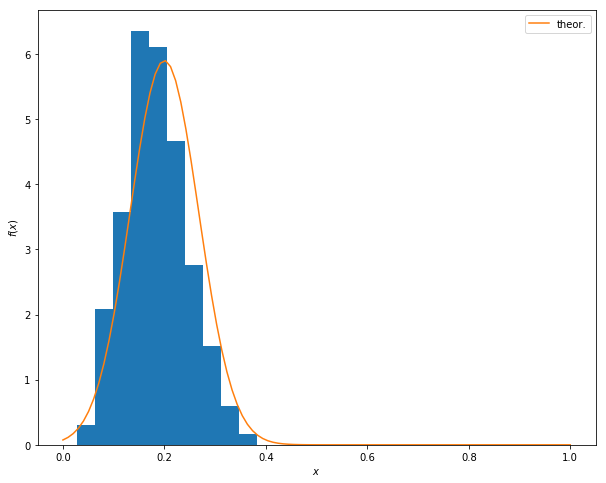

In [304]:
#Рассмотрим распределение выборочного среднего случайной величины при  n=10
fnc_gen(pr_beta,10)

Теоретическое среднее 0.20
Полученное 0.18
Теоретическое стандартное откл. 0.03
Полученное 0.03


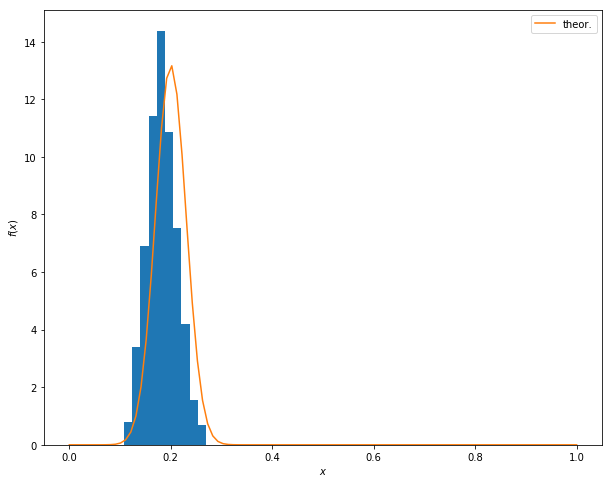

In [305]:
#Рассмотрим распределение выборочного среднего случайной величины при  n=50
fnc_gen(pr_beta,50)

### Вывод: 
#### Из полученных графиков видно, что ЦПТ отлично работает уже при маленьких значениях выборки, полученые значение среднего очень близко с теоретическом значении. Соответсвенно точность аппроксимации с ростом т возрастает, это видно из значений стандартного откл.